In [15]:
from numpy import *
from pylab import *
import scipy
from scipy.integrate import quad as integrate

In [2]:
x = linspace(0,1,1025)

In [24]:
def my_fun(x):
    return abs(x-.5)

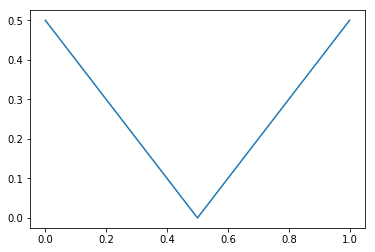

In [25]:
plot(x,my_fun(x))

In [74]:
n = 17
M = zeros((n,n))
## Hilbert matrix
for i in range(n):
    for j in range(n):
        M[i,j] = 1/(i+j+1)

In [75]:
F = array([integrate(lambda x: my_fun(x)*x**i,0,1)[0] for i in range(n)]) #[1] is the error

In [76]:
c = linalg.solve(M,F)

In [77]:
p = sum([c[i]*x**i for i in range(n)],axis=0)

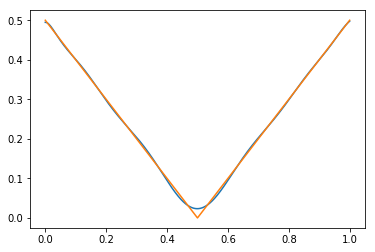

In [78]:
plot(x,p)
plot(x,my_fun(x))

In [79]:
from numpy.polynomial.legendre import leggauss
from numpy.polynomial.legendre import Legendre

In [210]:
n=50
N=2*n
q,w = leggauss(N) ## these are correct only for [-1,1]
## rescale for [0,1]
q = .5*(q+1)
w = .5*w

In [211]:
v = array([Legendre.basis(i,domain=[0,1])(x) for i in range(n)])
vq = array([Legendre.basis(i,domain=[0,1])(q) for i in range(n)])
vq.shape

(50, 100)

In [212]:
## compute the norms
norms = einsum('ij,ij,j->i',vq,vq,w)

In [213]:
## do the quadrature integral
ci = einsum('ij,j,j->i',vq,my_fun(q),w)/norms

In [214]:
p = einsum('i,ij->j',ci,v)

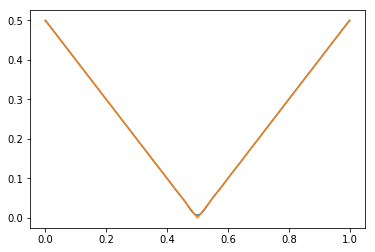

In [217]:
plot(x,p)
plot(x,my_fun(x))